In [136]:
V=['results/variant_predictions/A:Alberta:01:2020_(H1N2)v/',
 'results/variant_predictions/A:Bretagne:24241:2021/',
 'results/variant_predictions/A:California:71:2021/',
 'results/variant_predictions/A:Hessen:47:2020/',
 'results/variant_predictions/A:Hunan:42443:2015/',
 'results/variant_predictions/A:Iowa:32:2016/',
 'results/variant_predictions/A:Iowa:39:2015/',
 'results/variant_predictions/A:Michigan:383:2018/',
 'results/variant_predictions/A:Minnesota:19:2011/',
 'results/variant_predictions/A:Minnesota:45:2016/',
 'results/variant_predictions/A:Netherlands:10370-1b:2020/',
 'results/variant_predictions/A:Netherlands:3315:2016/',
 'results/variant_predictions/A:Ohio:09:2015/',
 'results/variant_predictions/A:Ohio:24:2017/',
 'results/variant_predictions/A:Ohio:35:2017/',
 'results/variant_predictions/A:Parana:720:2015/',
 'results/variant_predictions/A:Taiwan:1:2021/',
 'results/variant_predictions/A:Wisconsin:03:2021/',
'results/variant_predictions/A:Wisconsin:71:2016/']

In [159]:
import pandas as pd
import numpy as np
from emergenet.emergenet import predict_irat_emergence
RESULT_DIR = 'results/variant_predictions/'
import glob

R=None
num=1
for T in [0,1,3,6]:
    E=[]
    for v in V:
        FILESh=glob.glob(v+str(T)+'/results/H*csv')
        FILESn=glob.glob(v+'1/results/N*csv')
        har=pd.concat([pd.read_csv(i) for i in FILESh]).sort_values('risk')
        nar=pd.concat([pd.read_csv(i) for i in FILESn]).sort_values('risk')
        har=har[har.risk>0]
        nar=nar[nar.risk>0]
        a=har.head(num).risk.mean()
        b=nar.head(num).risk.mean()
        E=np.append(E,predict_irat_emergence(a,b)[0])
    print(T)
    if R is None:
        R=pd.DataFrame(E,V,columns=['t'+str(T)]).sort_values('t'+str(T))
    else:
        R=R.join(pd.DataFrame(E,V,columns=['t'+str(T)]).sort_values('t'+str(T)))
    
#R.sort_values('t0')



0
1
3
6


In [160]:
# Function to ensure non-decreasing order in rows
def make_non_decreasing(row):
    for i in range(1, len(row)):
        if row[i] < row[i-1]:
            row[i] = row[i-1]
    return row

R=R[['t6','t3','t1','t0']]
df = R.apply(make_non_decreasing, axis=1)
df

,t6,t3,t1,t0
results/variant_predictions/A:Bretagne:24241:2021/,3.279474,3.279474,3.279474,3.279474
results/variant_predictions/A:Parana:720:2015/,5.197156,5.197156,5.197156,5.197156
results/variant_predictions/A:Netherlands:3315:2016/,4.101500,4.101500,4.101500,4.331386
results/variant_predictions/A:Wisconsin:03:2021/,5.893916,5.893916,5.893916,5.893916
results/variant_predictions/A:Netherlands:10370-1b:2020/,4.936062,4.936062,5.005181,5.005181
results/variant_predictions/A:Minnesota:45:2016/,5.324719,5.919084,5.919084,5.919084
results/variant_predictions/A:Taiwan:1:2021/,5.365926,5.365926,5.466104,5.466104
results/variant_predictions/A:California:71:2021/,5.316394,5.375448,5.550471,5.550471
results/variant_predictions/A:Michigan:383:2018/,5.203912,6.085678,6.085678,6.085678
results/variant_predictions/A:Ohio:24:2017/,7.615888,7.615888,7.615888,7.615888


<AxesSubplot:>

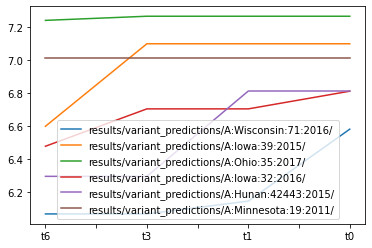

In [165]:
df.tail(6).T.plot()

In [169]:
df.T

,results/variant_predictions/A:Bretagne:24241:2021/,results/variant_predictions/A:Parana:720:2015/,results/variant_predictions/A:Netherlands:3315:2016/,results/variant_predictions/A:Wisconsin:03:2021/,results/variant_predictions/A:Netherlands:10370-1b:2020/,results/variant_predictions/A:Minnesota:45:2016/,results/variant_predictions/A:Taiwan:1:2021/,results/variant_predictions/A:California:71:2021/,results/variant_predictions/A:Michigan:383:2018/,results/variant_predictions/A:Ohio:24:2017/,results/variant_predictions/A:Alberta:01:2020_(H1N2)v/,results/variant_predictions/A:Hessen:47:2020/,results/variant_predictions/A:Ohio:09:2015/,results/variant_predictions/A:Wisconsin:71:2016/,results/variant_predictions/A:Iowa:39:2015/,results/variant_predictions/A:Ohio:35:2017/,results/variant_predictions/A:Iowa:32:2016/,results/variant_predictions/A:Hunan:42443:2015/,results/variant_predictions/A:Minnesota:19:2011/
t6,3.279474,5.197156,4.101500,5.893916,4.936062,5.324719,5.365926,5.316394,5.203912,7.615888,5.831221,5.804336,5.976553,6.066819,6.598494,7.241262,6.477352,6.294782,7.014558
t3,3.279474,5.197156,4.101500,5.893916,4.936062,5.919084,5.365926,5.375448,6.085678,7.615888,5.831221,5.831136,5.976553,6.066819,7.099321,7.266276,6.704187,6.294782,7.014558
t1,3.279474,5.197156,4.101500,5.893916,5.005181,5.919084,5.466104,5.550471,6.085678,7.615888,5.831221,5.965305,5.976553,6.144560,7.099321,7.266276,6.704187,6.812640,7.014558
t0,3.279474,5.197156,4.331386,5.893916,5.005181,5.919084,5.466104,5.550471,6.085678,7.615888,5.831221,5.965305,6.069506,6.581218,7.099321,7.266276,6.811512,6.812640,7.014558


In [166]:
import seaborn as sns


sns.violinplot(df.t6)

<AxesSubplot:xlabel='t6'>

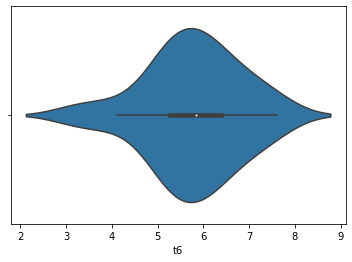

In [172]:
sns.violinplot(df.t6)

<AxesSubplot:>

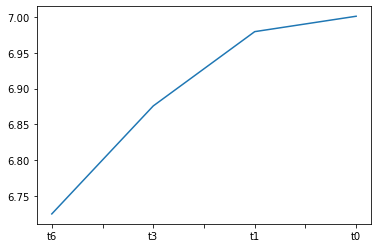

In [179]:
df.tail(5).mean().plot()

In [180]:
df.sort_values('t0')

,t6,t3,t1,t0
results/variant_predictions/A:Bretagne:24241:2021/,3.279474,3.279474,3.279474,3.279474
results/variant_predictions/A:Netherlands:3315:2016/,4.101500,4.101500,4.101500,4.331386
results/variant_predictions/A:Netherlands:10370-1b:2020/,4.936062,4.936062,5.005181,5.005181
results/variant_predictions/A:Parana:720:2015/,5.197156,5.197156,5.197156,5.197156
results/variant_predictions/A:Taiwan:1:2021/,5.365926,5.365926,5.466104,5.466104
results/variant_predictions/A:California:71:2021/,5.316394,5.375448,5.550471,5.550471
results/variant_predictions/A:Alberta:01:2020_(H1N2)v/,5.831221,5.831221,5.831221,5.831221
results/variant_predictions/A:Wisconsin:03:2021/,5.893916,5.893916,5.893916,5.893916
results/variant_predictions/A:Minnesota:45:2016/,5.324719,5.919084,5.919084,5.919084
results/variant_predictions/A:Hessen:47:2020/,5.804336,5.831136,5.965305,5.965305
